In [1]:
import torch 
import numpy as np 
import pandas as pd 
import torch
import os
import matplotlib.pyplot as plt 
import sys
sys.path.append('/home/davidcj/software/util/')
from parsers import parse_pdb, parse_pdb_multi
from shutil import copyfile
from scipy.optimize import curve_fit
conversion = 'ARNDCQEGHILKMFPSTWYV-'
import json
import random
import seaborn as sns
import pickle
import glob

/software/conda/envs/SE3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (98,118,119,121,122,127,133,134,135,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


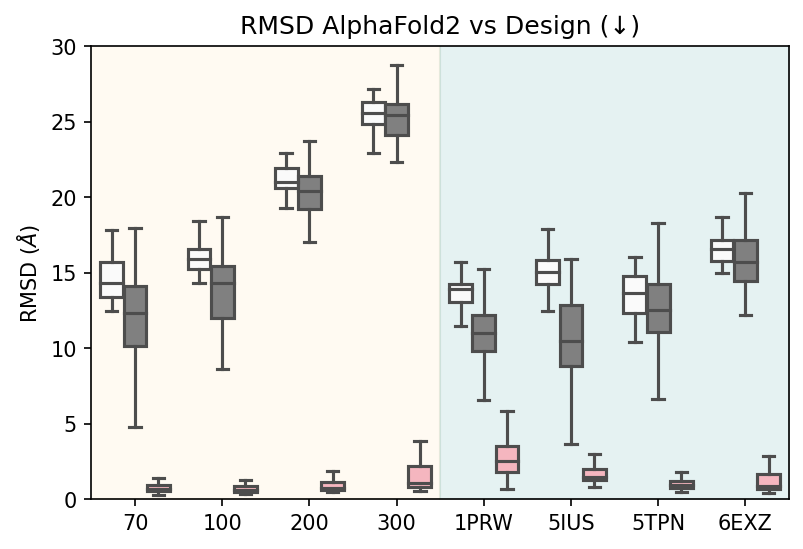

In [2]:
df=pd.read_csv('/home/jwatson3/for/jason/S2F_data.csv')
metric='rmsd_af2_des'
palette=['#FAFAFA','#808080','#FFACB7']
# Set your custom color palette
sns.set_palette(sns.color_palette(palette))
problems = ['uncond_70','uncond_100','uncond_200','uncond_300','1PRW','5IUS','5TPN','6EXZ_long']
random_order=['Random Noise','Outputs without Pre-Training','Outputs with Pre-Training']
df_temp = df
df_temp=df_temp.sort_values(metric)
df_temp = df_temp.drop_duplicates('name')
fig,ax=plt.subplots(dpi=150)
ax.fill_between([-0.7,3.5],35, alpha=0.15, color='#FFE0AC', zorder=0)
ax.fill_between([3.5,8.5],35, alpha=0.1, color='#008080', zorder=0)
ax = sns.boxplot(x='problem',y=metric, data=df_temp, hue='random', hue_order=random_order, order=problems, showfliers = False,  palette=palette)
ax.set_title("RMSD AlphaFold2 vs Design (\u2193)")
ax.set_ylabel("RMSD ($\AA$)")
labels = ['70','100','200','300','1PRW','5IUS','5TPN','6EXZ']
# ax.set_xticks(np.arange(len(problems)),labels)
ax.set_xticklabels(labels)
ax.set_ylim(0,30)
ax.set_xlabel("")
ax.get_legend().remove()
# ax.legend(title="")